# 📝 Exercise M4.03

In all previous notebooks, we only used a single feature in `data`. But we
have already shown that we could add new features to make the model more
expressive by deriving new features, based on the original feature.

The aim of this notebook is to train a linear regression algorithm on a
dataset more than a single feature.

We will load a dataset about house prices in California.
The dataset consists of 8 features regarding the demography and geography of
districts in California and the aim is to predict the median house price of
each district. We will use all 8 features to predict the target, the median
house price.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [4]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$

In [7]:
import pandas as pd

In [14]:
full_data = pd.concat([data,target],axis=1)

In [16]:
full_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452.6
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358.5
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352.1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341.3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342.2
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78.1
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77.1
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92.3
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84.7


Now this is your turn to train a linear regression model on this dataset.
You will need to:
* create a linear regression model;
* execute a cross-validation with 10 folds and use the mean absolute error
  (MAE) as metric. Ensure to return the fitted estimators;
* compute mean and std of the MAE in thousands of dollars (k$);
* show the values of the coefficients for each feature using a boxplot by
  inspecting the fitted model returned from the cross-validation. Hint: you
  use the function
  [`df.plot.box()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)
  to plot a box plot.

In [2]:
# Write your code here.: make the exercise
# create a linear regression model;
from sklearn.linear_model import LinearRegression


In [3]:
import seaborn as sns

<AxesSubplot:xlabel='MedInc', ylabel='AveRooms'>

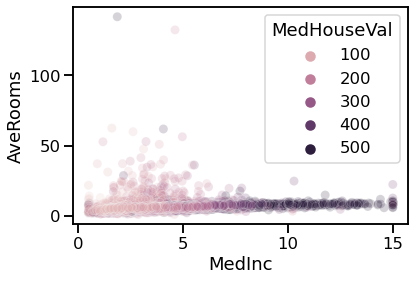

In [24]:
sns.scatterplot(data=full_data, x="MedInc", y="AveRooms",\
               alpha=0.2, hue="MedHouseVal")

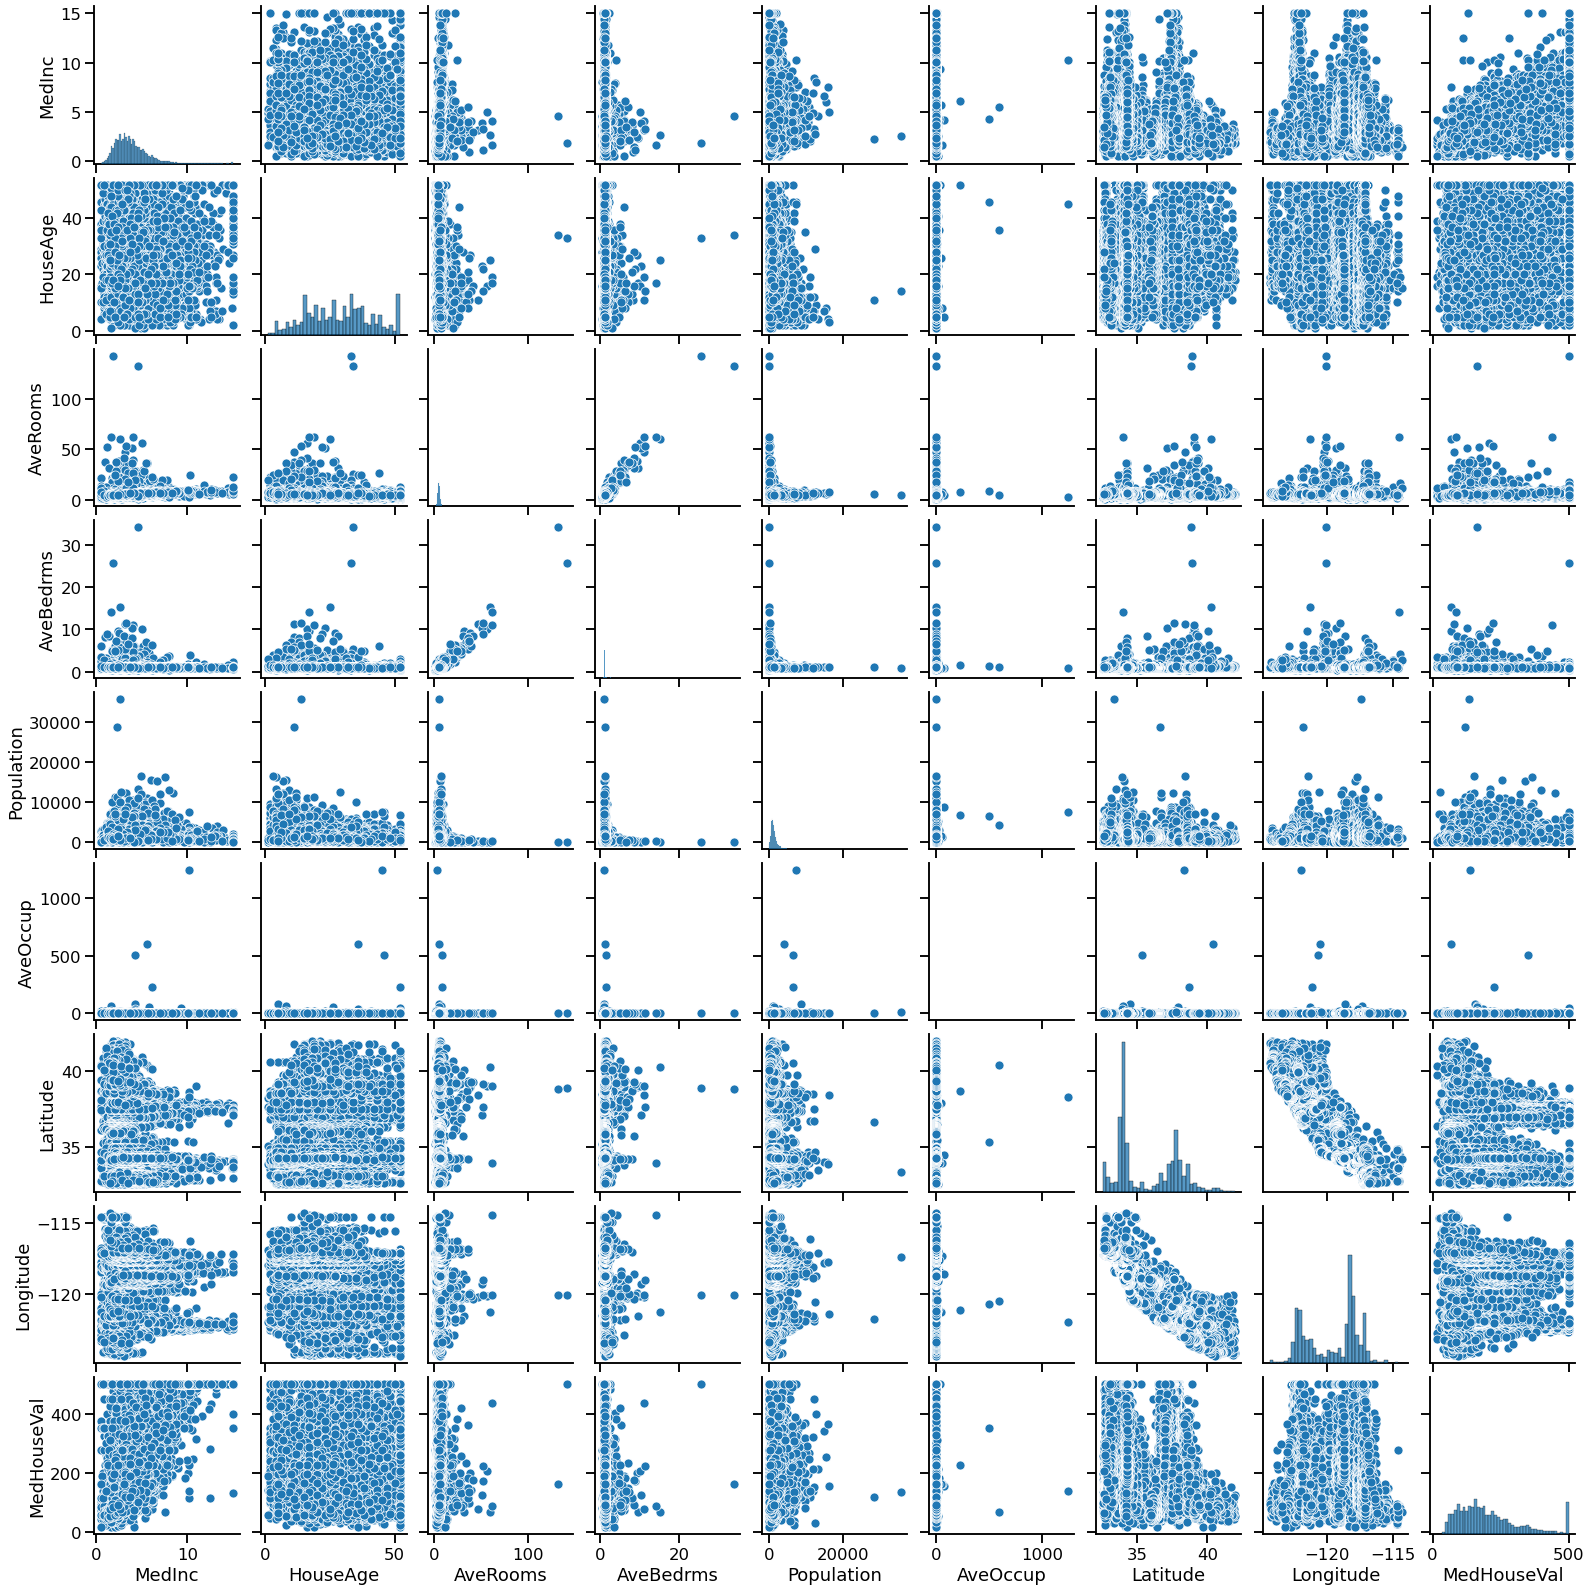

In [25]:
sns.pairplot(data=full_data)

In [26]:
model=LinearRegression()

In [27]:
model.fit(data, target)

LinearRegression()

In [28]:
from sklearn.model_selection import cross_validate

In [38]:
from sklearn.metrics import SCORERS

In [40]:
import re

In [52]:
keys = ' '.join(SCORERS.keys())
keys

'explained_variance r2 max_error neg_median_absolute_error neg_mean_absolute_error neg_mean_absolute_percentage_error neg_mean_squared_error neg_mean_squared_log_error neg_root_mean_squared_error neg_mean_poisson_deviance neg_mean_gamma_deviance accuracy top_k_accuracy roc_auc roc_auc_ovr roc_auc_ovo roc_auc_ovr_weighted roc_auc_ovo_weighted balanced_accuracy average_precision neg_log_loss neg_brier_score adjusted_rand_score rand_score homogeneity_score completeness_score v_measure_score mutual_info_score adjusted_mutual_info_score normalized_mutual_info_score fowlkes_mallows_score precision precision_macro precision_micro precision_samples precision_weighted recall recall_macro recall_micro recall_samples recall_weighted f1 f1_macro f1_micro f1_samples f1_weighted jaccard jaccard_macro jaccard_micro jaccard_samples jaccard_weighted'

In [68]:
re.findall('[:alpha:]*\ $',keys)

[]

In [69]:
cv_results = cross_validate(model, data, target, cv=10, scoring='neg_mean_absolute_error', return_estimator=True)

In [71]:
cv_results['test_score'].mean()*-1, cv_results['test_score'].std()

(54.45214393266328, 9.109300167800356)

In [76]:
folds = {i:cv_results['estimator'][i].coef_ for i in range(10)}

In [79]:
coeffs = pd.DataFrame(folds).T

In [80]:
coeffs.head()

,0,1,2,3,4,5,6,7
0,44.613222,1.073691,-12.817547,81.709895,-0.000448,-0.378220,-45.087728,-47.999610
1,42.847135,0.943540,-9.783829,60.456816,-0.000889,-0.412785,-40.634870,-42.380996
2,42.647915,0.925298,-7.777559,50.807236,-0.000674,-0.338461,-41.126288,-43.165241
3,43.824437,0.996925,-11.607237,68.100196,-0.000542,-0.355432,-42.755030,-43.586643
4,42.629253,0.907493,-9.490222,57.837555,0.000321,-0.348858,-42.324285,-44.153669


<AxesSubplot:>

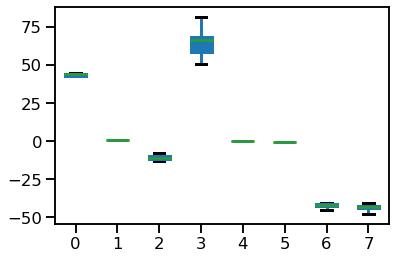

In [81]:
coeffs.plot.box()

<AxesSubplot:>

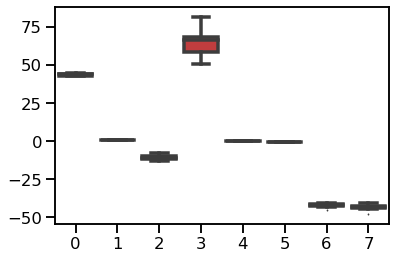

In [85]:
sns.boxplot(data=coeffs, fliersize=1)